In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np

In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'galhisub_test_tng100B_099S_0A_800R/results/'
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))

In [3]:
flib = FigureLibrary(hifile, 'pk')

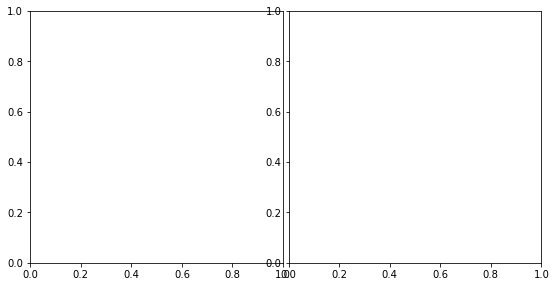

In [4]:
# flib.setGspecIndices([(0,0), (0,1), (1, slice(None))])
# flib.createFigGrid(2,2, panel_length = 3.5, panel_bt = [0.1, 1])
flib.createFigGrid(1,2, panel_length = 3.5)
# flib.setDim(1,2)
fig, panels = flib.getFig()

In [5]:
# ax = panels[1,1]
# ax.axis('off')
# bbox = ax.get_tightbbox(fig.canvas.get_renderer())

# ax.table(cellText=counts, colLabels = coltxt, rowLabels = rowtxt, rowColours = rowcol, loc = 'top')

In [6]:
# fig

In [7]:
rmp = {'HI_res':['diemer', 'low-threshold', 'mid-threshold','high-threshold']}
ip = {'fieldname':'hisubhalo'}
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real','redshift'],
                    'HI_res', rmprops = rmp)

In [8]:
bindefs = []
thdefs = []
for r in figarr[0,0]:
    hidef = r.props['HI_res']
    if hidef not in bindefs and 'bin' in hidef:
        bindefs.append(hidef)
    if hidef not in thdefs and 'threshold' in hidef:
        thdefs.append(hidef)
print(bindefs)


['high-bin', 'low-bin', 'lowest-bin', 'mid-bin']


In [9]:
# reordering bindefs so the legend looks better
bindefs = ['lowest-bin', 'low-bin', 'mid-bin', 'high-bin']

In [10]:
# make bins plots
colors = {}
labels = {}
for bn in bindefs:
    if 'high' in bn:
        colors[bn] = 'saddlebrown'
        labels[bn] = '10$^9$ $\\leq$ M$_{\\rm{HI}}$ / M$_{\\odot}$'

    elif 'lowest' in bn:
        colors[bn] = 'moccasin'
        labels[bn] = 'M$_{\\rm{HI}}$ / M$_{\\odot}$ < 10$^7$'
    elif 'low' in bn:
        colors[bn] = 'tan'
        labels[bn] = '10$^7$ $\\leq$ M$_{\\rm{HI}}$ / M$_{\\odot}$ < 10$^8$'
    elif 'mid' in bn:
        colors[bn] = 'chocolate'
        labels[bn] = '10$^8$ $\\leq$ M$_{\\rm{HI}}$ / M$_{\\odot}$ < 10$^9$'

dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        for bn in bindefs:
            ip = {'HI_res':bn}
            fkw = {'color':colors[bn], 'label':labels[bn]}
            flib.plotFill(idx, ip, fill_kwargs = fkw)
            
            

In [12]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams()

# labels
colkw = {'fontsize':14, 'ha':'left', 'va':'bottom'}
legkw = {'fontsize':10}
flib.colLabels(['Real Space', 'Redshift Space'], pos = (0.05, 0.05), txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x')
flib.axisLabel('y', txt_kwargs = {'rotation':'vertical'})

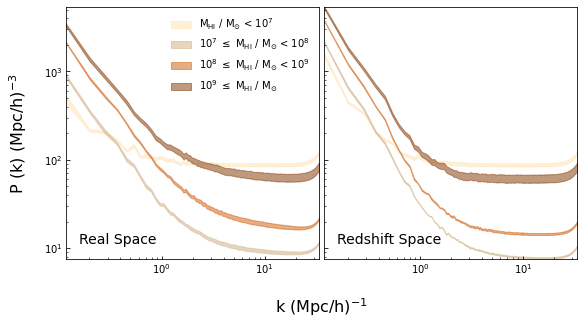

In [13]:
fig

In [14]:
col_props = flib.getPropVals('model')
col_props.sort()
row_props = ['lowest-bin', 'low-bin', 'mid-bin', 'high-bin']
figarr = flib.figarr
coltxt = []
rowtxt = []
rowcol = []
counts= np.zeros((len(row_props), len(col_props)), dtype=object)
for i in range(len(row_props)):
    for j in range(len(col_props)):
        iprops = {'model': col_props[j], 'HI_res':row_props[i], 'space':'real'}
        match = flib.getMatchingResults(iprops, {})
        if len(match) > 1:
            print('too many matches')
        match = match[0]
        counts[i,j] = str(match.count)
        if i == 0:
            coltxt.append(match.props['model'].split('_')[2] + ' ' + match.props['projection'].capitalize())
        if j == 0:
            rowtxt.append(labels[match.props['HI_res']])
            rowcol.append(colors[match.props['HI_res']])

        

In [16]:
import matplotlib.pyplot as plt


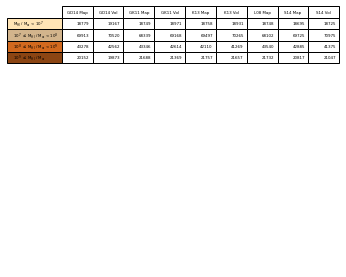

In [19]:
tablefig, ax = plt.subplots()
tablefig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=counts, colLabels = coltxt, rowLabels = rowtxt, rowColours = rowcol, loc = 'top')
tablefig.tight_layout()

In [21]:
tablefig.savefig('HI_bin_table.pdf')

In [22]:
fig.savefig('HI_bin_pk.pdf')

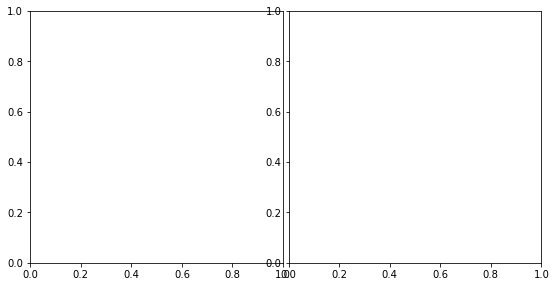

In [30]:
flib = FigureLibrary(hifile, 'pk')
flib.createFigGrid(1,2, panel_length = 3.5)
fig, panels = flib.getFig()
rmp = {'HI_res':['diemer', 'lowest-bin', 'low-bin', 'mid-bin','high-bin']}
ip = {'fieldname':'hisubhalo'}
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real','redshift'],
                    'HI_res', rmprops = rmp)

In [31]:
bindefs = []
thdefs = []
for r in figarr[0,0]:
    hidef = r.props['HI_res']
    if hidef not in bindefs and 'bin' in hidef:
        bindefs.append(hidef)
    if hidef not in thdefs and 'threshold' in hidef:
        thdefs.append(hidef)
print(thdefs)


['high-threshold', 'low-threshold', 'mid-threshold']


In [32]:
# make bins plots
colors = {}
labels = {}
for bn in thdefs:
    if 'high' in bn:
        colors[bn] = 'saddlebrown'
        labels[bn] = '10$^9$ < M$_{\\rm{HI}}$ / M$_{\\odot}$'

    elif 'lowest' in bn:
        colors[bn] = 'moccasin'
        labels[bn] = 'M$_{\\rm{HI}}$ / M$_{\\odot}$ < 10$^7$'
    elif 'low' in bn:
        colors[bn] = 'tan'
        labels[bn] = '10$^7$ < M$_{\\rm{HI}}$ / M$_{\\odot}$'
    elif 'mid' in bn:
        colors[bn] = 'chocolate'
        labels[bn] = '10$^8$ < M$_{\\rm{HI}}$ / M$_{\\odot}$'

dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        for bn in thdefs:
            ip = {'HI_res':bn}
            fkw = {'color':colors[bn], 'label':labels[bn]}
            flib.plotFill(idx, ip, fill_kwargs = fkw)
            
            

In [33]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams()

# labels
colkw = {'fontsize':14, 'ha':'left', 'va':'bottom'}
legkw = {'fontsize':10}
flib.colLabels(['Real Space', 'Redshift Space'], pos = (0.05, 0.05), txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x')
flib.axisLabel('y', txt_kwargs = {'rotation':'vertical'})

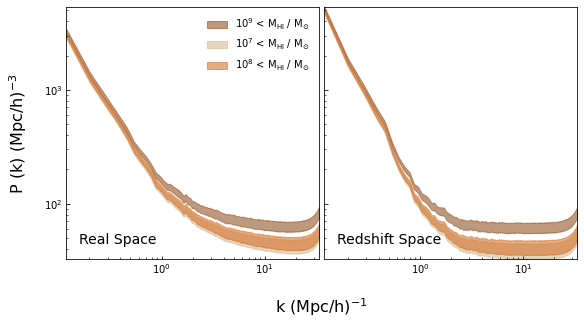

In [34]:
fig

In [35]:
fig.savefig('HI_threshold.pdf')